In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
 #Stuff to pip install
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

#Don't pip install
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
rate_spread                       0
dtype: int64


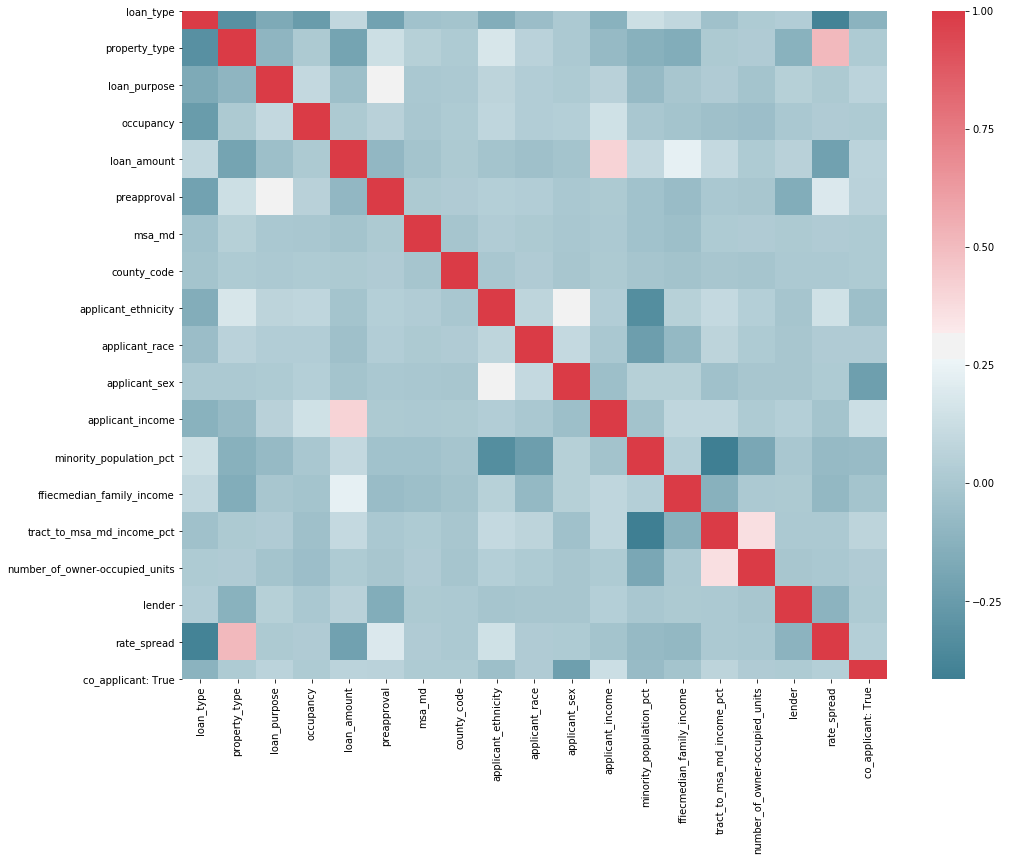

In [2]:
plt.figure(figsize=(16,16))
plt.gcf().subplots_adjust(bottom=0.30)
#Import CSV
train = pd.read_csv('train_values.csv')
#corr = train.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

plt.savefig("plot.svg")
train = train.fillna(train.mean())

print(train.isna().sum())

#Drops unnecessary columns

#X = train[[col for col in train.columns if col != 'rate_spread']]
X = train[[col for col in train.columns if col != 'row_id']]
#X = X[[col for col in X.columns if col != 'applicant_income']]
X = X[[col for col in X.columns if col != 'population']]
X = X[[col for col in X.columns if col != 'state_code']] #Contains -1 as a null
#X = X[[col for col in X.columns if col != 'minority_population_pct']]
#X = X[[col for col in X.columns if col != 'ffiecmedian_family_income']]
#X = X[[col for col in X.columns if col != 'tract_to_msa_md_income_pct']]
#X = X[[col for col in X.columns if col != 'number_of_owner-occupied_units']]
X = X[[col for col in X.columns if col != 'number_of_1_to_4_family_units']]
#X = X[[col for col in X.columns if col != 'loan_type']]

#What we want to predict
y = train['rate_spread']

#Make categorical data into 1 or 0
X['co_applicant'] = X['co_applicant'].map(lambda x: {1: 'co_applicant: True'}.get(x))
X = pd.get_dummies(X, prefix='', prefix_sep='')

corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [3]:
test = pd.read_csv('test_values.csv')
test = test.fillna(test.mean())

y = test[[col for col in test.columns if col != 'row_id']]
#y = y[[col for col in y.columns if col != 'applicant_income']]
y = y[[col for col in y.columns if col != 'population']]
#y = y[[col for col in y.columns if col != 'minority_population_pct']]
#y = y[[col for col in y.columns if col != 'ffiecmedian_family_income']]
#y = y[[col for col in y.columns if col != 'tract_to_msa_md_income_pct']]
#y = y[[col for col in y.columns if col != 'number_of_owner-occupied_units']]
y = y[[col for col in y.columns if col != 'state_code']]
y = y[[col for col in y.columns if col != 'number_of_1_to_4_family_units']]
#y = y[[col for col in y.columns if col != 'loan_type']]

y['co_applicant'] = y['co_applicant'].map(lambda q: {1: 'co_applicant: True'}.get(q))
test = pd.get_dummies(y, prefix='', prefix_sep='')

In [4]:
train_dataset = X.sample(frac=0.8,random_state=0)
test_dataset = X.drop(train_dataset.index)

In [5]:
test_dataset

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
2               1              2             1          1          168   
10              1              2             1          2           80   
21              1              1             1          1          181   
27              1              1             3          1          261   
30              2              1             1          1          170   
...           ...            ...           ...        ...          ...   
199976          2              1             1          1          119   
199978          1              2             3          1           29   
199986          2              1             2          1          102   
199997          4              1             3          1           67   
199999          2              1             2          1           11   

        preapproval  msa_md  county_code  applicant_ethnicity  applicant_race  \
2                 3     385          256                    3               2   
10                2     261           78                    3               3   
21                3      60           14                    2               5   
27                3      33          307                    2               5   
30                2     340           84                    3               6   
...             ...     ...          ...                  ...             ...   
199976            2      79           92                    2               5   
199978            3     163           41                    2               3   
199986            3     358          246                    3               6   
199997            3     261           52                    2               5   
199999            3      43          255                    2               5   

        applicant_sex  applicant_income  minority_population_pct  \
2                   1         34.000000                   79.635   
10                  1         49.000000                   14.353   
21                  2        148.000000                   78.274   
27                  1        217.000000                    5.563   
30                  2         95.000000                    9.760   
...               ...               ...                      ...   
199976              2        101.000000                    7.288   
199978              1         33.000000                   10.827   
199986              3         47.000000                   28.001   
199997              1         73.617902                    4.093   
199999              1         70.000000                   13.632   

        ffiecmedian_family_income  tract_to_msa_md_income_pct  \
2                         42883.0                      76.948   
10                        48288.0                      79.629   
21                        37781.0                     100.000   
27                        69544.0                     100.000   
30                        58537.0                     100.000   
...                           ...                         ...   
199976                    62102.0                      83.508   
199978                    66608.0                      93.233   
199986                    68268.0                      82.566   
199997                    55918.0                     100.000   
199999                    74058.0                     100.000   

        number_of_owner-occupied_units  lender  rate_spread  \
2                                636.0    1119            3   
10                               854.0     516            2   
21                              2334.0     683            3   
27                              1142.0    2390            1   
30                              1083.0     809            1   
...                                ...     ...          ...   
199976                          1484.0     516            1   
199978                          1907.0    10

In [6]:
train_stats = train_dataset.describe()
train_stats.pop("rate_spread")
train_stats = train_stats.transpose()
train_stats

count          mean           std  \
loan_type                       160000.0      1.570963      0.559780   
property_type                   160000.0      1.154469      0.364773   
loan_purpose                    160000.0      1.483062      0.822119   
occupancy                       160000.0      1.061481      0.246326   
loan_amount                     160000.0    142.668275    143.181301   
preapproval                     160000.0      2.703038      0.545415   
msa_md                          160000.0    226.960981    106.664277   
county_code                     160000.0    166.382362     92.834045   
applicant_ethnicity             160000.0      1.915544      0.513323   
applicant_race                  160000.0      4.762094      0.889283   
applicant_sex                   160000.0      1.417225      0.577094   
applicant_income                160000.0     73.724018    103.020151   
minority_population_pct         160000.0     34.236370     27.811185   
ffiecmedian_family_income       160000.0  64590.332019  12678.232151   
tract_to_msa_md_income_pct      160000.0     89.306346     14.959711   
number_of_owner-occupied_units  160000.0   1401.689477    700.044618   
lender                          160000.0   2002.863125   1270.942368   
co_applicant: True              160000.0      0.383650      0.486276   

                                      min          25%        50%  \
loan_type                           1.000      1.00000      2.000   
property_type                       1.000      1.00000      1.000   
loan_purpose                        1.000      1.00000      1.000   
occupancy                           1.000      1.00000      1.000   
loan_amount                         1.000     67.00000    116.000   
preapproval                         1.000      2.00000      3.000   
msa_md                              0.000    154.00000    261.000   
county_code                         0.000     83.00000    181.000   
applicant_ethnicity                 1.000      2.00000      2.000   
applicant_race                      1.000      5.00000      5.000   
applicant_sex                       1.000      1.00000      1.000   
applicant_income                    1.000     40.00000     59.000   
minority_population_pct             0.326     11.02900     26.329   
ffiecmedian_family_income       17860.000  56731.00000  63593.000   
tract_to_msa_md_income_pct          6.193     81.88175     98.676   
number_of_owner-occupied_units      3.000    936.00000   1311.000   
lender                              0.000    963.00000   1834.000   
co_applicant: True                  0.000      0.00000      0.000   

                                        75%       max  
loan_type                           2.00000       4.0  
property_type                       1.00000       3.0  
loan_purpose                        2.00000       3.0  
occupancy                           1.00000       3.0  
loan_amount                       179.00000   11104.0  
preapproval                         3.00000       3.0  
msa_md                            318.00000     408.0  
county_code                       249.00000     316.0  
applicant_ethnicity                 2.00000       4.0  
applicant_race                      5.00000       7.0  
applicant_sex                       2.00000       4.0  
applicant_income                   80.00000    9695.0  
minority_population_pct            51.65825     100.0  
ffiecmedian_family_income       71172.00000  124934.0  
tract_to_msa_md_income_pct        100.00000     100.0  
number_of_owner-occupied_units   1735.00000    8747.0  
lender                           3180.00000    4283.0  
co_applicant: True                  1.00000       1.0

In [7]:
train_labels = train_dataset.pop('rate_spread')
test_labels = test_dataset.pop('rate_spread')

In [8]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test = norm(test)

In [9]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  #model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  #optimizer = SGD
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[coeff_determination])
  return model

In [10]:
model = build_model()

In [11]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [12]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Rate Spread]')
  plt.plot(hist['epoch'], hist['coeff_determination'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_coeff_determination'],
           label = 'Val Error')
  plt.ylim([.4,1])
  plt.legend()
  plt.show()

Train on 128000 samples, validate on 32000 samples
Epoch 1/300
128000/128000 [==============================] - 8s 62us/sample - loss: 1.4821 - coeff_determination: 0.4503 - val_loss: 1.1522 - val_coeff_determination: 0.5137
Epoch 2/300
128000/128000 [==============================] - 8s 65us/sample - loss: 1.2975 - coeff_determination: 0.5221 - val_loss: 1.1164 - val_coeff_determination: 0.5055
Epoch 3/300
128000/128000 [==============================] - 7s 55us/sample - loss: 1.2486 - coeff_determination: 0.5382 - val_loss: 1.0823 - val_coeff_determination: 0.5426
Epoch 4/300
128000/128000 [==============================] - 7s 54us/sample - loss: 1.2170 - coeff_determination: 0.5499 - val_loss: 1.0516 - val_coeff_determination: 0.5542
Epoch 5/300
128000/128000 [==============================] - 7s 53us/sample - loss: 1.1965 - coeff_determination: 0.5526 - val_loss: 1.0443 - val_coeff_determination: 0.5595
Epoch 6/300
128000/128000 [==============================] - 7s 53us/sample - l

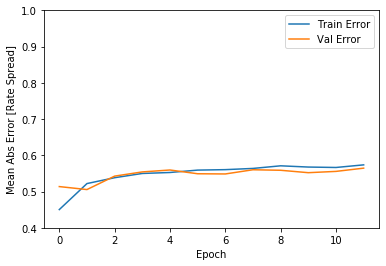

In [13]:
model = build_model()
EPOCHS = 300
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_coeff_determination', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[PrintDot(), early_stop])

plot_history(history)

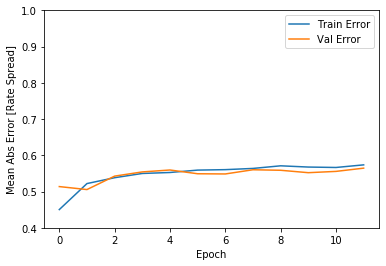

In [14]:
plot_history(history)

In [15]:
model.save('my_model.h5')

In [16]:
loss, mae= model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Rate_spread".format(mae))

40000/40000 - 1s - loss: 0.9472 - coeff_determination: 0.5679
Testing set Mean Abs Error:  0.57 Rate_spread


In [17]:
test_predictions = model.predict(normed_test).flatten()
print(test_predictions)

[5.658868  2.2309887 1.9266509 ... 1.4380617 1.3234699 1.1661855]


In [18]:
x_coord = []
y_coord = []

for i in range(len(y)):
    #print("X=%s, Predicted=%s" % (i, y[i]))
    x_coord.append(i)
    y_coord.append(test_predictions[i])

np.savetxt('predict3.csv', np.vstack((x_coord,y_coord)).T, delimiter=', ',fmt='%d, %f')